In [74]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [75]:
import os

# Load Dataset

In [76]:
def load_images_from_folder(folder):
    dataset = []
    for file in os.listdir(folder):
        image = np.asarray(Image.open(os.path.join(folder, file)))
        dataset.append(image)
    dataset = np.asarray(dataset)
    return dataset

In [77]:
def preprocess_dataset(dataset):
    # Normalize to 0-1
    dataset = dataset / 255.0
    np.random.shuffle(dataset)
    return dataset

In [78]:
train = preprocess_dataset(load_images_from_folder("data/train/"))

In [79]:
val = preprocess_dataset(load_images_from_folder("data/val/"))

In [80]:
test = preprocess_dataset(load_images_from_folder("data/test/"))

In [81]:
train.shape, val.shape, test.shape

((5856, 96, 96, 3), (440, 96, 96, 3), (448, 96, 96, 3))

# Visualize Some Examples

In [82]:
def array2img(array):
    plt.imshow(array)

In [83]:
data = {
    "train": train,
    "test": test,
    "val": val
}

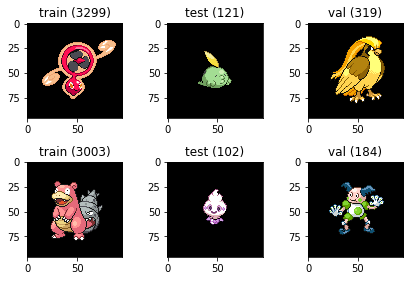

In [84]:
for i, dataset in enumerate(data.keys()):
    for j in range(2):
        index = np.random.randint(0, data[dataset].shape[0])
        axes = plt.subplot(2, 3, i+j*3+1)
        array2img(data[dataset][index])
        axes.set_title(f"{dataset} ({index})")
plt.tight_layout()

# Model Time